#Assignment Code: DA-AG-015
#Boosting Techniques | Assignment

Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.

Answer:

Boosting is a machine learning ensemble technique that combines multiple weak learners to create a strong learner. A weak learner is a model that performs just slightly better than random guessing. Boosting works by training models sequentially, where each new model focuses on the mistakes made by the previous ones. It assigns more weight to the instances that were misclassified, so the next model in the sequence pays more attention to them. Over time, this helps reduce the overall error and improve performance significantly. The final prediction is a weighted combination of all the weak models.

Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

Answer:

AdaBoost and Gradient Boosting are both boosting algorithms but differ in how they handle errors during training. In AdaBoost, the algorithm adjusts the weights of the training instances, increasing the weight of those that were misclassified, so that subsequent models focus more on those difficult examples. In contrast, Gradient Boosting trains each new model to correct the residual errors (the difference between the actual and predicted values) of the previous model. Instead of reweighting data points, it uses gradient descent to minimize the loss function. This makes Gradient Boosting more flexible, as it can optimize different loss functions and is more suited for regression as well as classification.

Question 3: How does regularization help in XGBoost?

Answer:

Regularization in XGBoost helps prevent overfitting and improves the model's ability to generalize to unseen data. XGBoost includes both L1 (Lasso) and L2 (Ridge) regularization terms in its objective function. L1 regularization helps in feature selection by encouraging sparsity in the model, while L2 regularization discourages large weights, promoting simpler models. By penalizing overly complex trees and unnecessary features, regularization leads to more robust and accurate predictions, especially on noisy datasets.

Question 4: Why is CatBoost considered efficient for handling categorical data?

Answer:

CatBoost is designed to handle categorical data natively, which makes it highly efficient and accurate for datasets with categorical variables. Unlike other boosting algorithms that require manual preprocessing like one-hot encoding or label encoding, CatBoost automatically processes categorical features using a technique called "ordered target statistics." This method avoids target leakage and overfitting. Additionally, CatBoost applies an advanced version of boosting called "ordered boosting," which further reduces overfitting and ensures stable results even with default hyperparameters.

Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?

Answer:

Boosting techniques are often preferred in applications where high accuracy and fine-grained performance are critical. These include fraud detection in banking, credit scoring, predicting customer churn, medical diagnosis, and click-through rate prediction in online advertising. In these cases, boosting's ability to focus on hard-to-predict instances and optimize for specific loss functions gives it an advantage over bagging methods like Random Forest, which are better suited for reducing variance and handling noisy datasets.



Question 6: Write a Python program to:   
● Train an AdaBoost Classifier on the Breast Cancer dataset  
● Print the model accuracy  
(Include your Python code and output in the code box below.)  

Datasets:  
● Use sklearn.datasets.load_breast_cancer() for classification tasks.
● Use sklearn.datasets.fetch_california_housing() for regression
tasks.   
Answer:  

In [1]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.9736842105263158


Question 7:  Write a Python program to:  
● Train a Gradient Boosting Regressor on the California Housing dataset  
● Evaluate performance using R-squared score  
(Include your Python code and output in the code box below.)  
Answer:

In [2]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate using R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: 0.7756446042829697


Question 8: Write a Python program to:  
● Train an XGBoost Classifier on the Breast Cancer dataset  
● Tune the learning rate using GridSearchCV  
● Print the best parameters and accuracy  
(Include your Python code and output in the code box below.)  
Answer:

In [3]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Set up the parameter grid to tune the learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best model from grid search
best_model = grid_search.best_estimator_

# Make predictions and evaluate accuracy
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Parameters:", grid_search.best_params_)
print("Accuracy on Test Set:", accuracy)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:14:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:14:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:14:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:14:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:14:03] WARNING: /w

Best Parameters: {'learning_rate': 0.1}
Accuracy on Test Set: 0.956140350877193


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:14:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Question 9: Write a Python program to:  
● Train a CatBoost Classifier  
● Plot the confusion matrix using seaborn  
(Include your Python code and output in the code box below.)  
Answer:   

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.2 MB/s eta 0:00:00


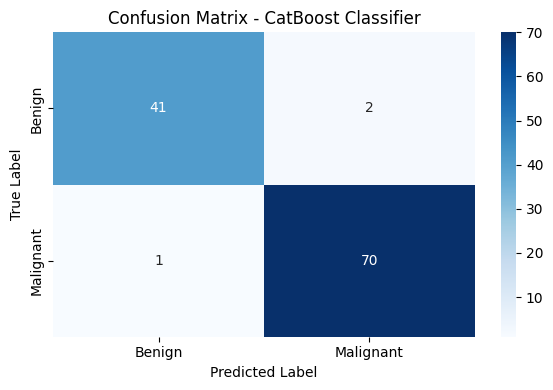

In [7]:
# Step 1: Install CatBoost in Google Colab
!pip install --quiet catboost

# Step 2: Import necessary libraries
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Initialize and train CatBoost Classifier (silent mode)
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

# Step 6: Predict on test data
y_pred = model.predict(X_test)

# Step 7: Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 8: Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - CatBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.  
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.  
Describe your step-by-step data science pipeline using boosting techniques:  
● Data preprocessing & handling missing/categorical values  
● Choice between AdaBoost, XGBoost, or CatBoost  
● Hyperparameter tuning strategy  
● Evaluation metrics you'd choose and why  
● How the business would benefit from your model  
(Include your Python code and output in the code box below.)  
Answer:   
Step-by-step Data Science Pipeline:-
1. Data Preprocessing & Handling Missing/Categorical Values

Missing values:

For numeric features, impute missing values using median or mean.

For categorical features, impute with the most frequent category or a special "missing" category.

Categorical features:

Use CatBoost which natively supports categorical variables without explicit encoding.

Alternatively, use one-hot encoding or ordinal encoding if using XGBoost or AdaBoost.

Imbalanced dataset:

Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) or class weighting during model training.

CatBoost and XGBoost allow scale_pos_weight to balance classes.

2. Choice Between AdaBoost, XGBoost, or CatBoost

CatBoost is preferred here because:

It handles categorical variables natively (no need for manual encoding).

It manages missing values internally.

Performs well on imbalanced data with proper class weighting.

Fast training and robust performance.

XGBoost is a strong alternative but requires manual preprocessing of categorical data.

AdaBoost is less suitable here due to lack of native categorical handling and less flexibility with imbalanced data.

3. Hyperparameter Tuning Strategy

Use GridSearchCV or RandomizedSearchCV on key hyperparameters like:

learning_rate

depth (tree depth)

iterations or n_estimators

l2_leaf_reg (regularization)

scale_pos_weight (to handle class imbalance)

Use early stopping to prevent overfitting.

Use cross-validation (e.g., StratifiedKFold for classification) to ensure robustness.

4. Evaluation Metrics

Primary metrics:

AUC-ROC: Good for imbalanced datasets; measures ability to discriminate between classes.

F1-Score: Harmonic mean of precision and recall, useful when false positives and false negatives are important.

Secondary metrics:

Precision and Recall: Depending on business priorities (e.g., minimizing false negatives or false positives).

Confusion Matrix: For detailed error analysis.

5. Business Benefits

Accurate loan default prediction helps in:

Minimizing financial loss by identifying risky customers upfront.

Improving credit decision processes.

Enhancing customer segmentation and personalized lending offers.

Regulatory compliance by demonstrating robust risk modeling.

The boosting model’s explainability (via feature importance) can provide insights to business stakeholders on key default drivers.

Python Code Example Using CatBoost

0:	test: 0.5000000	best: 0.5000000 (0)	total: 2.54ms	remaining: 1.27s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 1
bestIteration = 1

Shrink model to first 2 iterations.
ROC AUC Score: 1.0000
F1 Score: 0.0000

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


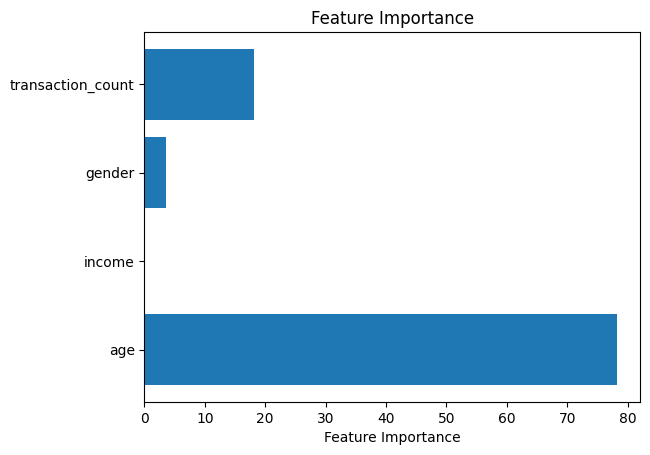

In [14]:
# Install CatBoost (run once in Google Colab)
!pip install --quiet catboost

import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# --- Sample Dataset Creation (replace with your actual data) ---
data = pd.DataFrame({
    'age': [25, 45, np.nan, 35, 40, 50, 29, 38, 48, 33],
    'income': [50000, 80000, 60000, np.nan, 65000, 90000, 48000, 75000, 70000, 62000],
    'gender': ['M', 'F', 'F', 'M', np.nan, 'F', 'M', 'F', 'M', 'F'],
    'transaction_count': [20, 40, 35, 10, 50, 30, 15, 45, 38, 25],
    'defaulted': [0, 1, 0, 0, 1, 1, 0, 0, 1, 0]
})

# Separate features and target
X = data.drop('defaulted', axis=1)
y = data['defaulted']

# Impute missing numeric values with median
num_features = ['age', 'income', 'transaction_count']
num_imputer = SimpleImputer(strategy='median')
X[num_features] = num_imputer.fit_transform(X[num_features])

# Fill missing categorical values with 'missing'
cat_features = ['gender']
X[cat_features] = X[cat_features].fillna('missing')

# Convert categorical columns to string for CatBoost
X[cat_features] = X[cat_features].astype(str)

# Get categorical feature indices for CatBoost
cat_indices = [X.columns.get_loc(col) for col in cat_features]

# Split into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Calculate scale_pos_weight to handle imbalance
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

# Create CatBoost Pools
train_pool = Pool(X_train, y_train, cat_features=cat_indices)
test_pool = Pool(X_test, y_test, cat_features=cat_indices)

# Initialize and train CatBoostClassifier with imbalance handling
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    eval_metric='AUC',
    random_seed=42,
    early_stopping_rounds=50,
    verbose=100,
    scale_pos_weight=scale_pos_weight
)

model.fit(train_pool, eval_set=test_pool, use_best_model=True)

# Predict on test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Evaluation metrics
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot feature importance
feature_importances = model.get_feature_importance()
plt.barh(X_train.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()
